[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/planetlabs/notebooks/blob/master/jupyter-notebooks/use_cases/coastal_erosion_example/5_plotting_a_histogram.ipynb)

## Preparing Your Workspace

### Option 1: (recommended) Run in Google Colab

[Open this Notebook in Colab](https://colab.research.google.com/github/planetlabs/notebooks/blob/master/jupyter-notebooks/sdsc-2022-workshop/5_plotting_a_histogram.ipynb), then run the following:

In [ ]:
!pip install rasterio
!wget https://storage.googleapis.com/pdd-stac/disasters/hurricane-harvey/0831/20170831_172754_101c_3B_AnalyticMS.tif

### Option 2: Run local Jupyter instance

You can also choose to open this Notebook in your own local Jupyter instance.

**Prerequisites**
- Install: [rasterio](https://pypi.org/project/rasterio) library
- Download example data: [20170831_172754_101c_3B_AnalyticMS.tif](https://storage.googleapis.com/pdd-stac/disasters/hurricane-harvey/0831/20170831_172754_101c_3B_AnalyticMS.tif)

In [1]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# This notebook explores a single 4-band (blue, green, red, near-infrared) PlanetScope scene in a UTM projection.
image_file = "/content/20170831_172754_101c_3B_AnalyticMS.tif"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)

In [2]:
# Load 3 of the bands into 2d arrays (excluding NIR for this example)
# recall that we previously learned 4-band PlanetScope band order is BGRN.
with rasterio.open(image_file) as src:
    blue = src.read(1)
    green = src.read(2)
    red = src.read(3)

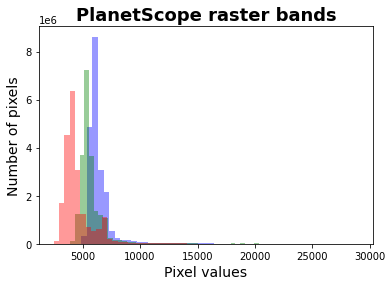

In [3]:
# Define a new figure
fig = plt.figure()

# Give this new figure a subplot, which will contain the histogram itself
ax = fig.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("PlanetScope raster bands", fontsize=18, fontweight='bold')
plt.xlabel("Pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# For the x-axis, we want to count every pixel that has a non-null value
b = blue[np.not_equal(blue, satdat.nodata)]
g = green[np.not_equal(green, satdat.nodata)]
r = red[np.not_equal(red, satdat.nodata)]

# Combine all of the bands into a list, for plotting
all_bands = [b, g, r]
all_band_colours = ['b','g','r']

# Define the number of bins to divide the data into
bins = 50

# Call 'hist` with our x-axis, bins, and colour details
for i in range(len(all_bands)):
    ax.hist(all_bands[i], bins, color=all_band_colours[i], alpha=0.4)

# Save the generated figure to an external image file
fig.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0)

# Finally - let's take a look!
plt.show()

We can see that most of the blue band values in our image seem to be around the 7000 range, then green and red peak at lower values. In our image, this corresponds to the value of the blue band when we are looking at flooded areas. It makes sense then that most of the blue band would correspond to water values!